# Mod 3 Code Challenge: Quality Assurance

The following analysis is intended to help a manufacturer avoid sending flawed parts to its customers.  They have provided a CSV dataset with past information about parts that have been flawed as well as parts that have not been flawed.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, plot_confusion_matrix, confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [55]:
df = pd.read_csv("quality_assurance.csv")

In [56]:
df.head()

,flawed,A,B,C,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,0,0.601453,0.517830,0.643975,0.640322,5269,3596.240435,7.582301,5.036856,6,...,13,27,49,99,88,67,28,1486.086217,221.448720,914.016198
1,0,0.658969,0.381051,0.711291,0.622806,2529,3915.484661,6.889634,5.463186,5,...,3,25,66,93,5,84,7,1041.388025,1012.210842,736.427250
2,0,0.829151,0.482311,0.695828,0.501425,3466,4938.989252,5.357629,8.479336,5,...,95,0,14,67,97,84,40,1080.024168,1177.252577,1350.203054
3,0,0.427164,0.302467,0.755639,0.623017,4637,5132.544164,4.607738,6.512086,4,...,58,56,39,3,19,36,37,558.167997,1426.797103,497.986919
4,0,0.455892,0.511045,0.834741,0.746559,2283,5652.261077,5.092637,5.744862,4,...,18,6,49,14,4,81,30,244.940104,1090.685747,178.180980


In [57]:
df.describe()

,flawed,A,B,C,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
count,500.000000,500.000000,475.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.208000,0.537038,0.424720,0.460606,0.520968,4878.526000,4838.623566,5.574845,5.802130,3.738000,...,49.540000,49.050000,48.224000,48.838000,50.88800,51.240000,48.508000,735.158720,743.363251,746.718788
std,0.406283,0.146943,0.146579,0.193812,0.169511,1761.392433,1719.163590,1.587353,1.431474,1.737641,...,29.135858,29.475568,28.119161,28.799002,29.60724,28.610199,30.109585,428.418133,439.706532,417.469840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.311943,0.474553,3.113954
25%,0.000000,0.447413,0.328684,0.313340,0.419994,3778.250000,3570.091136,4.605696,4.991045,3.000000,...,23.000000,23.000000,24.000000,24.000000,24.75000,27.000000,22.000000,358.761812,369.037255,403.933511
50%,0.000000,0.535245,0.427028,0.451957,0.530447,4847.500000,4812.028743,5.672153,5.859914,4.000000,...,52.000000,47.000000,47.000000,49.000000,52.00000,50.000000,47.000000,750.787234,719.556908,737.401755
75%,0.000000,0.629977,0.520857,0.611244,0.638043,5905.750000,5952.097299,6.588030,6.747137,5.000000,...,74.000000,77.000000,69.250000,74.000000,77.00000,77.000000,76.000000,1092.726302,1133.751316,1090.111319
max,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,10000.000000,10.000000,10.000000,10.000000,...,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,1499.126271,1495.460940,1496.597411


In [58]:
df.flawed.value_counts(normalize=True)

0    0.792
1    0.208
Name: flawed, dtype: float64

In [59]:
X = df.drop("flawed", axis=1)
y = df["flawed"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Preprocessing

First, remove missing values

In [61]:
X_train.isna().sum()

A     0
B    10
C     0
D     0
E     0
F     0
G     0
H     0
I     0
J     0
K     0
L     0
M     0
N     0
O     0
P     0
Q     0
R     0
S     0
T     0
U     0
V     0
W     0
X     0
Y     0
Z     0
dtype: int64

In [62]:
imputer = SimpleImputer()
imputer.fit(X_train)

SimpleImputer()

In [63]:
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)

In [64]:
X_train.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
Q    0
R    0
S    0
T    0
U    0
V    0
W    0
X    0
Y    0
Z    0
dtype: int64

Now that missing values are filled in, apply scaling

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [66]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [67]:
X_train.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,-0.182195,2.651329,2.307228,-1.330215,2.254339,-0.950211,-1.362018,-2.170987,0.159503,-0.407499,...,-0.764205,0.002598,0.057104,-0.935030,-0.210706,1.129001,-0.871019,-1.598601,-1.021046,1.671527
1,-0.740476,-0.872133,-1.371398,-0.411639,0.308575,-1.139487,0.085361,0.083841,-2.119116,0.160576,...,1.496621,0.741661,-1.036529,1.044788,1.192936,-0.869210,-0.027706,1.708830,0.574757,-0.871336
2,-2.025230,-0.630418,1.154322,-0.255331,-2.506833,-0.080195,-1.958433,1.840817,0.729158,1.296726,...,-0.216126,1.547913,1.468244,-0.205623,0.987525,1.129001,-0.061438,-1.490713,-0.943989,-0.811323
3,-0.636794,-0.141748,-0.953326,0.006883,-0.394256,-1.380725,-0.314150,-0.267118,0.159503,-0.407499,...,1.428111,-1.408342,0.656838,1.183722,-0.450352,-0.518647,-0.230101,0.698315,0.205386,-0.849349
4,-1.210566,-0.292733,-0.204884,0.606984,1.883967,0.680080,0.943868,0.269622,0.159503,0.728651,...,0.057914,1.413537,1.291851,1.183722,-0.895410,-0.413478,0.275887,1.362921,-0.467244,-1.651644


## Modeling

Now that the data has been prepared for modeling, let's try a `LogisticRegression` model with default parameters

In [68]:
first_model = LogisticRegression(random_state=2020)

Evaluate based on `recall_score`

In [69]:
f1_scorer = make_scorer(f1_score)

In [70]:
cross_val_score(first_model, X_train, y_train, scoring=f1_scorer)

array([0.78787879, 0.83870968, 0.73333333, 0.62068966, 0.66666667])

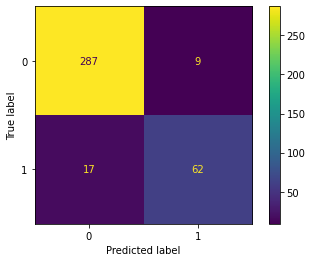

In [71]:
first_model.fit(X_train, y_train)
plot_confusion_matrix(first_model, X_train, y_train);

Try a different solver with L1 penalty

In [72]:
second_model = LogisticRegression(solver="liblinear", penalty="l1", random_state=2020)

In [73]:
cross_val_score(second_model, X_train, y_train, scoring=f1_scorer)

array([0.76470588, 0.86666667, 0.75      , 0.62068966, 0.71428571])

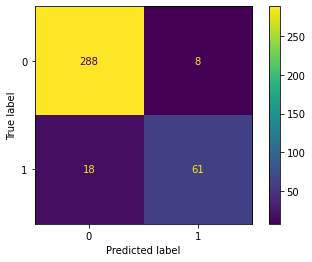

In [74]:
second_model.fit(X_train, y_train)
plot_confusion_matrix(second_model, X_train, y_train);

The second model performed better on the cross-validated data for 3/5 of the folds, and slightly worse on the training data.  This indicates that we are preventing some overfitting by switching to using an L1 penalty.  Therefore I choose the second model as my final model.

## Model Evaluation

Now that I have a final model, I will demonstrate its performance on the test dataset

In [75]:
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [76]:
final_model = LogisticRegression(solver="liblinear", penalty="l1")
final_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [79]:
f1_score(y_test, final_model.predict(X_test))

0.8076923076923077

In [80]:
recall_score(y_test, final_model.predict(X_test))

0.84

In [78]:
confusion_matrix(y_test, final_model.predict(X_test))

array([[94,  6],
       [ 4, 21]])

In [53]:
y_test.value_counts()

0    100
1     25
Name: flawed, dtype: int64

The f1 score of our final model is 0.81 which indicates that the model is performing moderately well on both precision and recall. The recall score of our final model is 0.84, which means that we are correctly flagging 84% of the parts with manufacturing flaws.  So, for the test set, that would mean that we correctly flagged 21 of the 24 flawed parts.  Assuming the previous baseline was 0%, this is a substantial improvement, and I recommend putting this model into production.

In [89]:
dict(zip(X_train.columns, final_model.coef_[0]))

{'A': 0.23371626842234144,
 'B': -0.2190914245429601,
 'C': -0.47137677989303495,
 'D': -0.6019961922836139,
 'E': 2.6976459889651547,
 'F': 0.367819602349197,
 'G': -0.9302402645306672,
 'H': -0.2324573632008139,
 'I': -0.011219343498442365,
 'J': 0.35588268350772023,
 'K': 0.015518539135526043,
 'L': 0.09468759433571373,
 'M': 0.03629344877661394,
 'N': -0.006283223162228509,
 'O': 0.1290554314927846,
 'P': 0.27423697968030225,
 'Q': 0.0,
 'R': 0.14034949802649305,
 'S': 0.04288598271703693,
 'T': 0.1861908030334729,
 'U': -0.797935394805448,
 'V': -0.15290435489597454,
 'W': -0.24891444555341652,
 'X': -0.24705631436960077,
 'Y': 0.0,
 'Z': 0.0682534866257052}

The smaller the magnitude of the coefficient, the less impact the feature has on our predictions.  The coefficients for feature `'Q'` and feature `'Y'` have been reduced to zero by regularization, meaning they have no impact on the current predictions, so those would be good candidates to no longer be collected.

## Bonus: More Complex Models

In [90]:
logreg_scores = cross_val_score(final_model, X_train, y_train, scoring=f1_scorer)
logreg_scores

array([0.76470588, 0.86666667, 0.75      , 0.62068966, 0.71428571])

In [91]:
random_forest = RandomForestClassifier()
rfc_scores = cross_val_score(random_forest, X_train, y_train, scoring=f1_scorer)
rfc_scores

array([0.82758621, 0.74074074, 0.81481481, 0.68965517, 0.72      ])

In [92]:
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train, y_train, scoring=f1_scorer)
knn_scores

array([0.66666667, 0.66666667, 0.47619048, 0.45454545, 0.43478261])

The Random Forest Classifier model performs better than our final Logistic Regression model on 4/5 cross validated folds. So I choose the Random Forest Model and the final model.

In [93]:
random_forest.fit(X_train, y_train)
preds = random_forest.predict(X_test)
f1_score(y_test, preds)

0.8636363636363636

In [94]:
recall_score(y_test, preds)

0.76

In [95]:
confusion_matrix(y_test, random_forest.predict(X_test))

array([[100,   0],
       [  6,  19]])

This model performance may not be optimal for my employer's needs. While this model has a higher f1_score, the random forest model has a recall score 8% points lower than final Logistic Regression Model. This model appears to be overfit on the `0` class of these data. Future work could involve adjusting parameters for the Random Forest model to improve performance on the `1` class. 